In [180]:
#import required libraries
# numpy
# seaborn
# matplotlib
# pandas
# train_test_split
# StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [181]:
from google.colab import drive
drive.mount('./mount')
df = pd.read_csv("mount/My Drive/creditcard.csv")

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [182]:
df2= df.drop(['Time'],axis=1)

xtrain , xtest = train_test_split(df2,test_size=0.2,random_state=27)
#xtrain=xtrain[xtrain.Class==0]

In [184]:
xtrain=xtrain.drop(['Class'],axis=1)
ytest=xtest['Class']
xtest=xtest.drop(['Class'],axis=1)
ytest = [ytest== 1]
#error_df_false=error_df[(error_df.true_class==1)]

KeyError: ignored

In [164]:
mean = xtrain.mean(axis=0)
std  = xtrain.std(axis=0)

In [165]:
xtrain=(xtrain-mean)/std
xtest =(xtest-mean)/std

In [166]:
xtrain = xtrain.to_numpy()
xtest=xtest.to_numpy()
ytest=ytest.to_numpy()

In [167]:
print(np.mean(xtrain,axis=0))
print(np.std(xtrain,axis=0))
print(np.mean(xtest,axis=0))
print(np.std(xtest,axis=0))

[-9.51153347e-18 -3.77342803e-18 -5.48862259e-18 -2.37008703e-17
  9.54271883e-18 -4.24120837e-18  2.24534561e-17  4.86491548e-18
 -3.67987197e-18 -7.79633891e-18 -2.60709573e-17 -2.18297490e-19
 -1.04782795e-17 -4.24120837e-18 -1.25365130e-17 -1.43452636e-17
 -1.02911674e-18  2.55719916e-18 -7.17263180e-19  1.37215565e-18
  5.58217866e-18  1.30978494e-17 -4.24120837e-18  3.41479644e-18
 -4.52187657e-18 -8.66952887e-18  0.00000000e+00  3.11853556e-19
 -8.07077004e-17]
[0.99999781 0.99999781 0.99999781 0.99999781 0.99999781 0.99999781
 0.99999781 0.99999781 0.99999781 0.99999781 0.99999781 0.99999781
 0.99999781 0.99999781 0.99999781 0.99999781 0.99999781 0.99999781
 0.99999781 0.99999781 0.99999781 0.99999781 0.99999781 0.99999781
 0.99999781 0.99999781 0.99999781 0.99999781 0.99999781]
[-5.30160921e-03  2.97571410e-03  4.83073788e-03 -8.97714841e-03
  6.15737560e-03  2.68480049e-04 -6.74065248e-04 -1.61998484e-03
 -3.28962520e-03 -3.88300025e-03  8.30461440e-03  1.14895670e-02
  3.751

In [168]:
from tensorflow.keras.layers import Input , Dense
from tensorflow.keras.models import Model

#parameters
batch_size=100
epochs=10
intermediate_dim1 =20
intermediate_dim2 =10
latent_dim=5
original_dim=29
epsilon_std=1.0

Encoder

In [169]:
input_layer=Input(shape=(original_dim,),name="input_layer")
dense_layer1=Dense(intermediate_dim1,activation='tanh',name="dense_layer1")(input_layer)
dense_layer2=Dense(intermediate_dim2,activation='relu',name="dense_layer2")(dense_layer1)
dense_layer3=Dense(latent_dim,activation='relu',name="dense_layer3")(dense_layer2)
#encoder=Model(input_layer,dense_layer3,name="encoder")
encoder = Model(input_layer, dense_layer3, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 29)]              0         
                                                                 
 dense_layer1 (Dense)        (None, 20)                600       
                                                                 
 dense_layer2 (Dense)        (None, 10)                210       
                                                                 
 dense_layer3 (Dense)        (None, 5)                 55        
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 865 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Decoder

In [170]:
decoder_input=Input(shape=(latent_dim,))
decoder_d1=Dense(intermediate_dim2,activation='relu')(decoder_input)
decoder_d2=Dense(intermediate_dim1,activation='relu')(decoder_d1)
decoder_d3=Dense(original_dim,activation='tanh')(decoder_d2)
decoder=Model(decoder_input,decoder_d3)
decoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_27 (Dense)            (None, 10)                60        
                                                                 
 dense_28 (Dense)            (None, 20)                220       
                                                                 
 dense_29 (Dense)            (None, 29)                609       
                                                                 
Total params: 889 (3.47 KB)
Trainable params: 889 (3.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


AutoEncoder

In [171]:
output=decoder(encoder(input_layer))
autoencoder=Model(input_layer,output)
autoencoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 29)]              0         
                                                                 
 encoder (Functional)        (None, 5)                 865       
                                                                 
 model_13 (Functional)       (None, 29)                889       
                                                                 
Total params: 1754 (6.85 KB)
Trainable params: 1754 (6.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


training Autoencoder

In [172]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

history=autoencoder.fit(xtrain,xtrain,
                        epochs=epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(xtest,xtest),
                        verbose=1).history

Epoch 1/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.7914 - accuracy: 0.1858 - val_loss: 0.7448 - val_accuracy: 0.2014
Epoch 2/10
2279/2279 [==============================] - 6s 3ms/step - loss: 0.7295 - accuracy: 0.2131 - val_loss: 0.7239 - val_accuracy: 0.2240
Epoch 3/10
2279/2279 [==============================] - 9s 4ms/step - loss: 0.7126 - accuracy: 0.2267 - val_loss: 0.7100 - val_accuracy: 0.2269
Epoch 4/10
2279/2279 [==============================] - 6s 3ms/step - loss: 0.7013 - accuracy: 0.2329 - val_loss: 0.6996 - val_accuracy: 0.2337
Epoch 5/10
2279/2279 [==============================] - 8s 4ms/step - loss: 0.6912 - accuracy: 0.2335 - val_loss: 0.6905 - val_accuracy: 0.2387
Epoch 6/10
2279/2279 [==============================] - 7s 3ms/step - loss: 0.6820 - accuracy: 0.2429 - val_loss: 0.6817 - val_accuracy: 0.2540
Epoch 7/10
2279/2279 [==============================] - 7s 3ms/step - loss: 0.6724 - accuracy: 0.2546 - val_loss: 0.6729 - val_accuracy

In [173]:
predictions = autoencoder.predict(xtest)

1781/1781 [==============================] - 3s 2ms/step


In [174]:
mse = np.mean(np.power(xtest-predictions,2),axis=1)

In [175]:
error_df=pd.DataFrame({'reconstruction_error':mse,'true_class':ytest})
error_df_true =error_df[(error_df.true_class==0)]
error_df_false=error_df[(error_df.true_class==1)]
#error_df
print("Fraud Sample",error_df_false.describe())

Fraud Sample        reconstruction_error  true_class
count            104.000000       104.0
mean              19.775140         1.0
std               26.015725         0.0
min                0.177542         1.0
25%                2.850412         1.0
50%                7.018106         1.0
75%               20.025154         1.0
max              137.222548         1.0


In [176]:
from sklearn.metrics import confusion_matrix

In [177]:
threshold=0.9
groups = error_df.groupby('true_class')
y_pred=[1 if e > threshold else 0 for e in error_df.reconstruction_error.values]


<Axes: >

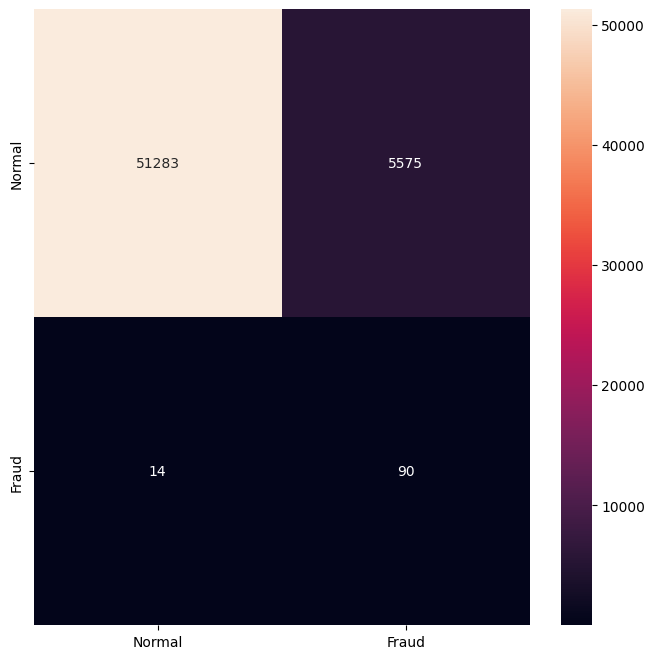

In [178]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
confusion_matrix=confusion_matrix(error_df.true_class,y_pred)
LABELS=['Normal','Fraud']
sns.heatmap(confusion_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt="d")